In [ ]:
# Link to Google Colab: https://colab.research.google.com/drive/1kDmL8KHwMkGNlgpNVrLtLOYxxu7JG1tA?usp=sharing

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
file_url = 'https://raw.githubusercontent.com/lnguye782/ECGR-4105-Intro-to-ML/refs/heads/main/HW3/diabetes.csv'
data = pd.read_csv(file_url)

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
# Separate features and target variable
X = data.drop(columns='Outcome')
Y = data['Outcome']

In [14]:
# Split the data set into Training Data (80%) and Test Data (20%)
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [15]:
# Scale the data between 0 and 1 to get better accuracy
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [16]:
# Make an instance classifier of the object LogisticRegression
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [17]:
# Predict on the test data
Y_pred = classifier.predict(X_test)

In [18]:
# Use confusion matrix to get accuracy of the model
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(Y_test, Y_pred)

In [22]:
# Evaluate the model using model evaluation metrics: accuracy, precision, recall, and F1 score
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))
print("F1 Score:",metrics.f1_score(Y_test, Y_pred))

Accuracy: 0.7532467532467533
Precision: 0.6491228070175439
Recall: 0.6727272727272727
F1 Score: 0.6607142857142857


Text(45.72222222222221, 0.5, 'Actual label')

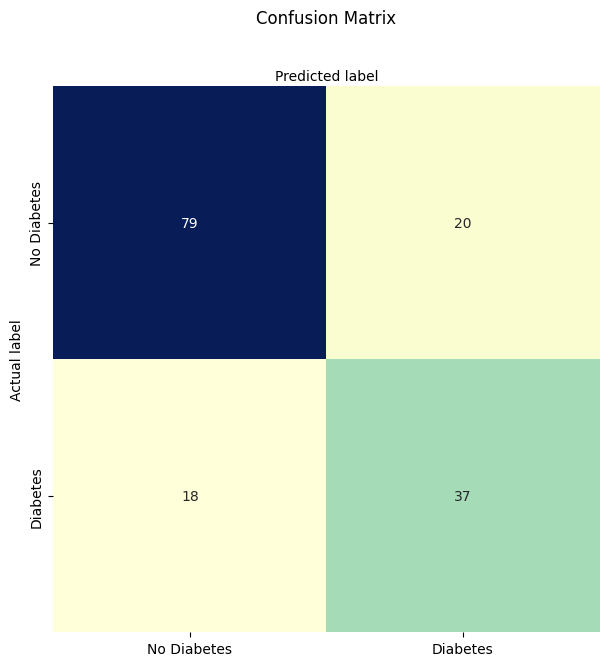

In [28]:
# Visualize the results of the model in the form of a confusion matrix using matplotlib and seaborn
# Plot the confusion matrix using Heatmap
import seaborn as sns

plt.figure(figsize=(6, 6))
ax = plt.subplot()

# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, fmt='d', cmap='YlGnBu', cbar=False, xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])

ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

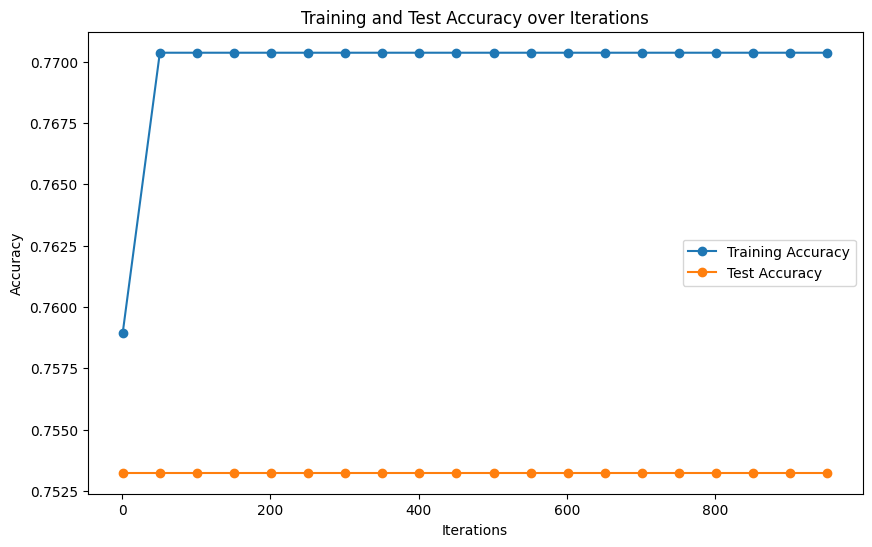

In [34]:
import warnings
warnings.filterwarnings('ignore')

train_accuracies = []
test_accuracies = []

for i in range(1, 1000, 50):
    # Create a logistic regression model with the current number of iterations
    model = LogisticRegression(max_iter=i, solver='liblinear')
    model.fit(X_train, Y_train)

    # Training accuracy
    train_accuracy = model.score(X_train, Y_train)
    train_accuracies.append(train_accuracy)

    # Test accuracy
    test_accuracy = model.score(X_test, Y_test)
    test_accuracies.append(test_accuracy)

# Plot the results
iterations = np.arange(1, 1000, 50)
plt.figure(figsize=(10, 6))
plt.plot(iterations, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(iterations, test_accuracies, label='Test Accuracy', marker='o')
plt.title('Training and Test Accuracy over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()